In [1]:
import gzip
from collections import defaultdict
import math
import scipy.optimize
from sklearn import svm
import numpy
import string
import random
import string
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import MinMaxScaler
from implicit import bpr
# from surprise import SVD, Reader, Dataset
# from surprise.model_selection import train_test_split

In [2]:
def readGz(path):
    for l in gzip.open(path, 'rt', encoding = 'utf8'):
        yield eval(l)

In [3]:
def readJSON(path):
    f = gzip.open(path, 'rt', encoding = 'utf8')
    f.readline()
    for l in f:
        d = eval(l)
        yield d

In [4]:
def readJSON2(path):
    f = gzip.open(path, 'rt', encoding = 'utf8')
    f.readline()
    for l in f:
        d = eval(l.replace("null","None"))
        yield d

# modcloth dataset visualization

In [5]:
modcloth = []
for l in readJSON("modcloth_final_data.json.gz"):
    modcloth.append(l)

In [6]:
modcloth[1]

{'item_id': '123373',
 'waist': '30',
 'size': 7,
 'quality': 2,
 'cup size': 'b',
 'shoe size': '9.00',
 'bra size': '32',
 'category': 'new',
 'length': 'slightly long',
 'height': '5ft 7in',
 'user_name': 'Ugggh',
 'fit': 'small',
 'user_id': '395665'}

In [7]:
def sfeature(feature):
    ans=dict()
    ans['-1']=0
    for d in modcloth:
        if feature in d:
            if d[feature] in ans:
                ans[d[feature]]+=1
            else:
                ans[d[feature]]=1
        else:
            ans['-1']+=1
    return ans

In [8]:
shoes=sfeature("shoe size")

In [9]:
shoes

{'-1': 54874,
 '9.00': 3599,
 '8.50': 3982,
 '11.00': 860,
 '7.00': 3193,
 '6.00': 1338,
 '8.00': 3832,
 '6.50': 1829,
 '10.00': 2419,
 '7.50': 3704,
 '5.50': 589,
 '9.50': 1806,
 '10.50': 356,
 '5.00': 316,
 '11.50': 91,
 '38': 1}

In [10]:
cups=sfeature("cup size")

In [11]:
cups

{'-1': 6255,
 'b': 14628,
 'dd/e': 12557,
 'c': 18370,
 'd': 16148,
 'ddd/f': 6117,
 'dddd/g': 2008,
 'i': 189,
 'a': 4791,
 'h': 1042,
 'aa': 296,
 'j': 200,
 'k': 188}

In [12]:
cups_index={'aa': 0,'a': 1,'b': 2, 'c': 3,'d': 4,'dd/e': 5,'ddd/f': 6,'dddd/g': 7,'h': 8,'i': 9,'j': 10,'k': 11}

In [13]:
bra=sfeature("bra size")

In [14]:
bra

{'-1': 6018,
 '36': 19624,
 '32': 10026,
 '38': 11923,
 '42': 3373,
 '40': 5115,
 '44': 2014,
 '34': 22411,
 '46': 596,
 '30': 1052,
 '48': 379,
 '28': 258}

In [113]:
category=sfeature("category")

In [16]:
category

{'-1': 0,
 'new': 21487,
 'dresses': 18650,
 'wedding': 275,
 'sale': 2524,
 'tops': 20364,
 'bottoms': 15266,
 'outerwear': 4223}

In [111]:
category_index={'new': 1,'dresses': 2,'wedding': 3,'sale': 4,'tops': 5,'bottoms': 6,'outerwear': 7}

In [112]:
length=sfeature("length")

In [19]:
length

{'-1': 35,
 'just right': 61943,
 'slightly long': 11261,
 'very short': 803,
 'slightly short': 6319,
 'very long': 2428}

In [20]:
length_index={'very short': 0,'slightly short': 1,'just right': 2,'slightly long': 3,'very long': 4}

In [116]:
height=sfeature("height")

In [117]:
height

{'-1': 1107,
 '5ft 2in': 7684,
 '5ft 7in': 9161,
 '5ft 4in': 11928,
 '5ft 3in': 8680,
 '5ft 5in': 9418,
 '5ft 10in': 2715,
 '5ft 6in': 11890,
 '5ft 8in': 6420,
 '5ft': 2252,
 '5ft 9in': 4574,
 '5ft 1in': 3571,
 '5ft 11in': 1395,
 '4ft 11in': 731,
 '4ft 10in': 242,
 '6ft': 630,
 '3ft 4in': 3,
 '4ft 9in': 48,
 '6ft 3in': 12,
 '6ft 1in': 144,
 '6ft 2in': 78,
 '3ft': 16,
 '4ft 7in': 5,
 '4ft 4in': 2,
 '7ft 11in': 23,
 '4ft 2in': 3,
 '6ft 6in': 8,
 '4ft 8in': 11,
 '6ft 4in': 7,
 '3ft 11in': 1,
 '6ft 5in': 10,
 '7ft 6in': 2,
 '3ft 6in': 2,
 '3ft 3in': 2,
 '6ft 8in': 2,
 '7ft 5in': 1,
 '7ft 3in': 1,
 '7ft 7in': 2,
 '6ft 7in': 1,
 '4ft 5in': 5,
 '3ft 2in': 1,
 '4ft 6in': 1}

In [118]:
fit=sfeature("fit")

In [24]:
fit

{'-1': 0, 'small': 12973, 'fit': 56757, 'large': 13059}

In [25]:
modcloth[3]

{'item_id': '123373',
 'category': 'new',
 'size': 18,
 'quality': 5,
 'user_name': 'dberrones1',
 'length': 'slightly long',
 'fit': 'small',
 'bra size': '36',
 'cup size': 'b',
 'user_id': '944840',
 'height': '5ft 2in'}

In [26]:
modcloth_fea= [copy.copy(item) for item in modcloth]

In [27]:
modcloth_fea[1245]

{'item_id': '126885',
 'size': 15,
 'quality': 3,
 'cup size': 'c',
 'hips': '41.0',
 'bra size': '38',
 'category': 'new',
 'length': 'just right',
 'height': '5ft 5in',
 'user_name': 'MeLisa',
 'fit': 'fit',
 'user_id': '915130'}

In [28]:
for i,d in enumerate(modcloth_fea):
    if 'waist' in d:
        modcloth_fea[i]['waist']=int(d['waist'])
    else:
        modcloth_fea[i]['waist']=-1
    
    if 'cup size' in d:
        modcloth_fea[i]['cup size']=cups_index[d['cup size']]
    else:
        modcloth_fea[i]['cup size']=-1
        
    if 'shoe size' in d:
        modcloth_fea[i]['shoe size']=float(d['shoe size'])
    else:
        modcloth_fea[i]['shoe size']=-1
        
    if 'bra size' in d:
        modcloth_fea[i]['bra size']=int(d['bra size'])
    else:
        modcloth_fea[i]['bra size']=-1
        
    cat=[0]*7
    cat[category_index[d['category']]-1]=1
    modcloth_fea[i]['category_int']=category_index[d['category']]
    modcloth_fea[i]['category']=cat
    
    
    
    if 'length' in d:
        modcloth_fea[i]['length']=int(length_index[d['length']])
    else:
        modcloth_fea[i]['length']=-1
    
    if 'height' in d:
        if "in" in d['height']:
            modcloth_fea[i]['height']=float(d['height'].replace("ft ",".").replace("in",""))
        else:
            modcloth_fea[i]['height']=float(d['height'].replace("ft",""))
    else:
        modcloth_fea[i]['height']=-1
    
    if modcloth_fea[i]['fit']=="fit":
        modcloth_fea[i]['fit']=1
    else:
        modcloth_fea[i]['fit']=0
    
    

In [29]:
modcloth_fea[1]

{'item_id': '123373',
 'waist': 30,
 'size': 7,
 'quality': 2,
 'cup size': 2,
 'shoe size': 9.0,
 'bra size': 32,
 'category': [1, 0, 0, 0, 0, 0, 0],
 'length': 3,
 'height': 5.7,
 'user_name': 'Ugggh',
 'fit': 0,
 'user_id': '395665',
 'category_int': 1}

In [30]:
mean={'waist': 0,'size': 0, 'cup size': 0, 'shoe size': 0, 'bra size': 0, 'length': 0, 'height': 0, 'category_int': 0}
mean_cnt={'waist': 0,'size': 0, 'cup size': 0, 'shoe size': 0, 'bra size': 0, 'length': 0, 'height': 0, 'category_int': 0}
for d in modcloth_fea:
    for k in mean.keys():
        if k!="shoe size":
            mean[k]+= 0 if d[k]==-1 else d[k]
            mean_cnt[k]+= 0 if d[k]==-1 else 1
        else:
            mean[k]+= 0 if d[k]==-1 or d[k]==38 else d[k]
            mean_cnt[k]+= 0 if d[k]==-1 else 1
for k in mean.keys():
    mean[k]/=mean_cnt[k]

In [31]:
for d in modcloth_fea:
    for k in mean.keys():
        if k!="shoe size":
            mean[k]+= 0 if d[k]==-1 else d[k]
            mean_cnt[k]+= 0 if d[k]==-1 else 1
        else:
            mean[k]+= 0 if d[k]==-1 or d[k]==38 else d[k]
            mean_cnt[k]+= 0 if d[k]==-1 else 1
for k in mean.keys():
    mean[k]/=mean_cnt[k]
    if k!= 'shoe size' and k!= 'height':
        mean[k]=int(mean[k])

In [32]:
mean

{'waist': 15,
 'size': 6,
 'cup size': 1,
 'shoe size': 4.072374072297787,
 'bra size': 17,
 'length': 1,
 'height': 2.728215251607958,
 'category_int': 1}

In [33]:
for d in modcloth_fea:
    for k in mean.keys():
        d[k]= mean[k] if d[k]==-1 else d[k]

In [34]:
modcloth_fea[2]

{'item_id': '123373',
 'category': [1, 0, 0, 0, 0, 0, 0],
 'size': 21,
 'quality': 5,
 'user_name': 'alexmeyer626',
 'length': 2,
 'fit': 1,
 'cup size': 5,
 'user_id': '875643',
 'waist': 15,
 'shoe size': 4.072374072297787,
 'bra size': 17,
 'category_int': 1,
 'height': 2.728215251607958}

In [35]:
len(modcloth)

82789

In [36]:
modcloth[0]

{'item_id': '123373',
 'waist': '31',
 'size': 13,
 'quality': 3,
 'cup size': 'b',
 'hips': '30',
 'bra size': '36',
 'category': 'new',
 'length': 'just right',
 'height': '5ft 2in',
 'user_name': 'sydneybraden2001',
 'fit': 'small',
 'user_id': '587883'}

In [37]:
itemperuser=defaultdict(set)
userperitem=defaultdict(set)

In [38]:
for d in modcloth:
    itemperuser[d['user_id']].add(d['item_id'])
    userperitem[d['item_id']].add(d['user_id'])

In [39]:
print(len(itemperuser))
print(len(userperitem))

47958
1378


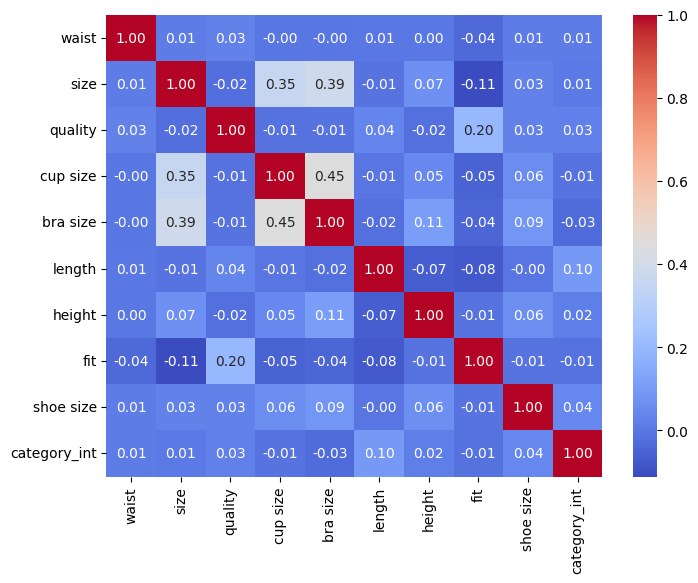

In [40]:
df = pd.DataFrame(modcloth_fea)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8, 6))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

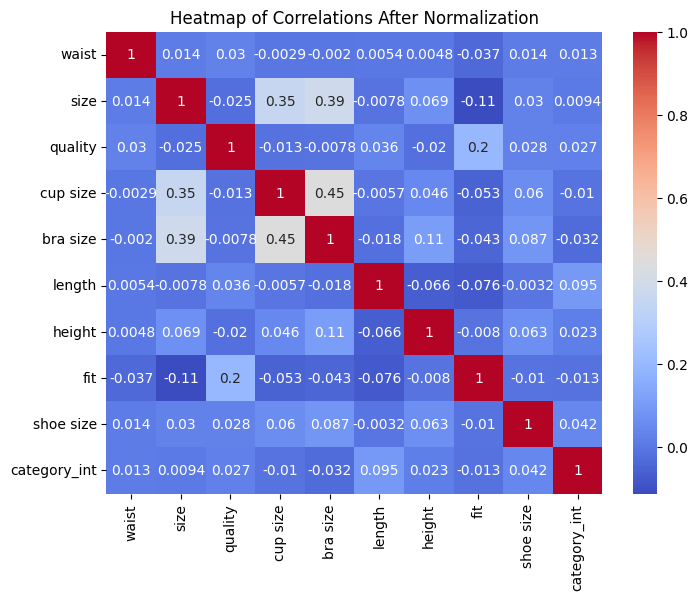

In [41]:
df = pd.DataFrame(modcloth_fea)
scaler = MinMaxScaler()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
corr = df.corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations After Normalization')
plt.savefig("heatmap_ds1")
plt.show()

# renttherunway dataset visualization

In [42]:
renttherunway = []
for l in readJSON2("renttherunway_final_data.json.gz"):
    renttherunway.append(l)

In [43]:
len(renttherunway)

192543

In [44]:
renttherunway[2]

{'fit': 'fit',
 'user_id': '909926',
 'bust size': '34c',
 'item_id': '126335',
 'weight': '135lbs',
 'rating': '8',
 'rented for': 'formal affair',
 'review_text': "I rented this for my company's black tie awards banquet.  I liked that this dress was short but was a little fancier with the sequins. (I generally don't care for long dresses.)  I would describe the color as more rose gold than yellow gold.  I have blonde hair and fair skin, and the color was very flattering.  This is a very forgiving dress! It's form fitting without making you feel like you're squeezed into it.  I would rent this one again.  Highly recommend!",
 'body type': 'pear',
 'review_summary': 'Dress arrived on time and in perfect condition. ',
 'category': 'dress',
 'height': '5\' 5"',
 'size': 8,
 'age': '34',
 'review_date': 'February 12, 2014'}

In [45]:
itemperuser2=defaultdict(set)
userperitem2=defaultdict(set)

In [46]:
for d in renttherunway:
    itemperuser2[d['user_id']].add(d['item_id'])
    userperitem2[d['item_id']].add(d['user_id'])

In [47]:
print(len(itemperuser2))
print(len(userperitem2))

105571
5850


In [48]:
def sfeature2(feature):
    ans=dict()
    ans['-1']=0
    for d in renttherunway:
        if feature in d:
            if d[feature] in ans:
                ans[d[feature]]+=1
            else:
                ans[d[feature]]=1
        else:
            ans['-1']+=1
    return ans

In [49]:
rented=sfeature2("rented for")
rented

{'-1': 10,
 'other': 15388,
 'party': 35626,
 'formal affair': 40408,
 'wedding': 57784,
 'date': 7388,
 'everyday': 16822,
 'vacation': 4074,
 'work': 15042,
 'party: cocktail': 1}

In [50]:
rent_index={'other': 1,'party': 2,
 'formal affair': 3,
 'wedding': 4,
 'date': 5,
 'everyday': 6,
 'vacation': 7,
 'work': 8}

In [51]:
category=sfeature2("category")
category.pop('-1', None)
category

{'gown': 44381,
 'sheath': 19316,
 'dress': 92884,
 'leggings': 112,
 'top': 4931,
 'jumpsuit': 5184,
 'sweater': 1149,
 'jacket': 2404,
 'shirtdress': 729,
 'maxi': 3443,
 'shift': 5365,
 'romper': 3069,
 'pants': 422,
 'shirt': 277,
 'mini': 1751,
 'skirt': 1531,
 'pullover': 58,
 'blouse': 651,
 'suit': 123,
 'coat': 980,
 'trench': 20,
 'bomber': 128,
 'cape': 84,
 'blazer': 782,
 'vest': 278,
 'duster': 12,
 'ballgown': 16,
 'tank': 181,
 'poncho': 48,
 'frock': 205,
 'tunic': 162,
 'cardigan': 241,
 'culottes': 188,
 'down': 464,
 'trouser': 55,
 'midi': 57,
 'pant': 107,
 'legging': 87,
 'print': 103,
 'knit': 48,
 'culotte': 75,
 'sweatshirt': 125,
 'peacoat': 39,
 'kaftan': 17,
 'overalls': 6,
 'jogger': 6,
 'tee': 22,
 'combo': 8,
 'henley': 8,
 'cami': 16,
 'blouson': 14,
 'turtleneck': 34,
 'trousers': 18,
 'overcoat': 2,
 'hoodie': 14,
 't-shirt': 13,
 'caftan': 4,
 'tight': 15,
 'kimono': 30,
 'for': 7,
 'crewneck': 1,
 'skirts': 7,
 'parka': 17,
 'buttondown': 1,
 'skort

In [52]:
len(category)

68

In [53]:
cat_index={}
for i,k in enumerate(category.keys()):
    cat_index[k]=i+1

In [54]:
bust=sfeature2("bust size")
bust.pop('-1', None)
bust

{'34b': 27285,
 '34c': 23139,
 '32b': 10911,
 '34d+': 1417,
 '36d': 11122,
 '36a': 2087,
 '34d': 18028,
 '32d+': 930,
 '36c': 13516,
 '32c': 9943,
 '32dd': 1714,
 '30dd': 102,
 '32d': 11196,
 '36b': 9676,
 '34a': 7891,
 '34dd': 2665,
 '40ddd/e': 47,
 '32a': 5094,
 '38d+': 661,
 '38c': 2669,
 '34ddd/e': 1030,
 '38a': 82,
 '38b': 1032,
 '38d': 4259,
 '36ddd/e': 445,
 '38dd': 520,
 '38f': 48,
 '42dd': 49,
 '36dd': 1468,
 '40g': 16,
 '40dd': 115,
 '28f': 20,
 '30ddd/e': 108,
 '32ddd/e': 726,
 '28b': 73,
 '36d+': 948,
 '40d': 145,
 '28dd': 31,
 '34f': 121,
 '42c': 46,
 '30d': 195,
 '30b': 103,
 '42d': 44,
 '34aa': 280,
 '32aa': 331,
 '36f': 66,
 '28c': 56,
 '40b': 17,
 '36aa': 66,
 '34g': 115,
 '32f': 145,
 '42ddd/e': 30,
 '40c': 89,
 '28g': 7,
 '28aa': 17,
 '36g': 94,
 '30a': 72,
 '44ddd/e': 11,
 '30c': 163,
 '30aa': 8,
 '44dd': 36,
 '32i': 7,
 '32g': 128,
 '30g': 25,
 '38h': 24,
 '30h': 13,
 '34j': 11,
 '38ddd/e': 190,
 '32h': 30,
 '28a': 60,
 '44d': 9,
 '40h': 9,
 '38g': 47,
 '34h': 57,


In [55]:
cha=set()
for k in bust.keys():
    cha.add(k.lstrip('0123456789'))
print(cha)
chaind={'aa':0/13,'a':1/13,'b':2/13, 'c':3/13, 'd':4/13, 'd+':5/13, 'dd':6/13, 'ddd/e':7/13, 'f':8/13, 'g':9/13, 'h':10/13, 'i':11/13, 'j':12/13}
chaind

{'c', 'd', 'b', 'j', 'dd', 'd+', 'f', 'g', 'i', 'ddd/e', 'aa', 'h', 'a'}


{'aa': 0.0,
 'a': 0.07692307692307693,
 'b': 0.15384615384615385,
 'c': 0.23076923076923078,
 'd': 0.3076923076923077,
 'd+': 0.38461538461538464,
 'dd': 0.46153846153846156,
 'ddd/e': 0.5384615384615384,
 'f': 0.6153846153846154,
 'g': 0.6923076923076923,
 'h': 0.7692307692307693,
 'i': 0.8461538461538461,
 'j': 0.9230769230769231}

In [56]:
weight=sfeature2("weight")
weight

{'-1': 29982,
 '132lbs': 1405,
 '135lbs': 13705,
 '145lbs': 9519,
 '138lbs': 2116,
 '112lbs': 1530,
 '118lbs': 2561,
 '114lbs': 731,
 '120lbs': 10687,
 '142lbs': 858,
 '140lbs': 12162,
 '170lbs': 2883,
 '143lbs': 585,
 '115lbs': 7231,
 '123lbs': 1213,
 '122lbs': 1635,
 '165lbs': 3660,
 '130lbs': 14370,
 '155lbs': 5130,
 '105lbs': 2401,
 '190lbs': 1060,
 '150lbs': 8937,
 '136lbs': 660,
 '128lbs': 3023,
 '174lbs': 111,
 '125lbs': 12869,
 '110lbs': 4595,
 '160lbs': 5647,
 '180lbs': 1915,
 '175lbs': 1884,
 '134lbs': 818,
 '109lbs': 197,
 '124lbs': 927,
 '250lbs': 153,
 '195lbs': 368,
 '231lbs': 3,
 '161lbs': 60,
 '126lbs': 915,
 '210lbs': 357,
 '215lbs': 216,
 '220lbs': 347,
 '163lbs': 174,
 '106lbs': 267,
 '178lbs': 183,
 '157lbs': 328,
 '185lbs': 996,
 '108lbs': 1044,
 '200lbs': 848,
 '92lbs': 23,
 '137lbs': 960,
 '117lbs': 1215,
 '146lbs': 329,
 '116lbs': 750,
 '141lbs': 160,
 '103lbs': 219,
 '121lbs': 329,
 '127lbs': 1692,
 '111lbs': 172,
 '152lbs': 372,
 '172lbs': 111,
 '107lbs': 432,

In [57]:
body=sfeature2("body type")
body

{'-1': 14637,
 'straight & narrow': 14742,
 'pear': 22135,
 'athletic': 43667,
 'hourglass': 55348,
 'full bust': 15006,
 'petite': 22131,
 'apple': 4877}

In [58]:
body_index={'straight & narrow': 1,
 'pear': 2,
 'athletic': 3,
 'hourglass': 4,
 'full bust': 5,
 'petite': 6,
 'apple': 7}

In [59]:
renttherunway_fea= [copy.copy(item) for item in renttherunway]

In [60]:
for i,d in enumerate(renttherunway_fea):
    if 'age' in d:
        renttherunway_fea[i]['age']=int(d['age'])
    else:
        renttherunway_fea[i]['age']=-1
        
    if 'weight' in d:
        renttherunway_fea[i]['weight']=int(d['weight'].replace("lbs",""))
    else:
        renttherunway_fea[i]['weight']=-1
        
    if 'bust size' in d:
        num=int(d['bust size'].rstrip('abcdefghijklmnopqrstuvwxyz/+'))
        character=chaind[d['bust size'].lstrip('0123456789')]
        renttherunway_fea[i]['bust size']=num+character
    else:
        renttherunway_fea[i]['bust size']=-1
        
    if 'rating' in d and d['rating']!= None:
        renttherunway_fea[i]['rating']=int(d['rating'])
    else:
        renttherunway_fea[i]['rating']=-1
        
    rent=[0]*8
    if 'rented for' not in d or d['rented for']=='party: cocktail':
        renttherunway_fea[i]['rented_int']=-1
        renttherunway_fea[i]['rented for']=rent
    else:
        renttherunway_fea[i]['rented_int']=rent_index[d['rented for']]
        rent[rent_index[d['rented for']]-1]=1
        renttherunway_fea[i]['rented for']=rent
    
    cat=[0]*68
    cat[cat_index[d['category']]-1]=1
    renttherunway_fea[i]['category_int']=cat_index[d['category']]
    renttherunway_fea[i]['category']=cat
    
    bt=[0]*7
    if 'body type' not in d:
        renttherunway_fea[i]['bodytype_int']=-1
        renttherunway_fea[i]['body type']=bt
    else:
        renttherunway_fea[i]['bodytype_int']=body_index[d['body type']]
        bt[body_index[d['body type']]-1]=1
        renttherunway_fea[i]['body type']=bt
    
    if 'height' in d:
        if '"' in d['height']:
            renttherunway_fea[i]['height']=float(d['height'].replace("\' ",".").replace('"',""))
        else:
            renttherunway_fea[i]['height']=float(d['height'].replace("\'",""))
    else:
        renttherunway_fea[i]['height']=-1
    
    if renttherunway_fea[i]['fit']=="fit":
        renttherunway_fea[i]['fit']=1
    else:
        renttherunway_fea[i]['fit']=0
    
    

In [61]:
renttherunway_fea[0]

{'fit': 1,
 'user_id': '273551',
 'bust size': 34.15384615384615,
 'item_id': '153475',
 'weight': 132,
 'rating': 10,
 'rented for': [1, 0, 0, 0, 0, 0, 0, 0],
 'review_text': 'I rented this dress for a photo shoot. The theme was "Hollywood Glam and Big Beautiful Hats". The dress was very comfortable and easy to move around in. It is definitely on my list to rent again for another formal event. ',
 'body type': [1, 0, 0, 0, 0, 0, 0],
 'review_summary': 'I felt so glamourous!!!',
 'category': [1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'height': 5.6,
 'size': 12,
 'age': 36,
 'review_date': 'June 18, 2013',
 'rented_int': 1,
 'category_int': 1,
 'bodytype_int': 1}

In [62]:
mean2={'bust size': 0,'weight': 0, 'rating': 0, 'height': 0, 'size': 0, 'age': 0, 'rented_int': 0, 'category_int': 0, 'bodytype_int': 0}
mean_cnt2={'bust size': 0,'weight': 0, 'rating': 0, 'height': 0, 'size': 0, 'age': 0, 'rented_int': 0, 'category_int': 0, 'bodytype_int': 0}
for d in renttherunway_fea:
    for k in mean2.keys():
        mean2[k]+= 0 if d[k]==-1 else d[k]
        mean_cnt2[k]+= 0 if d[k]==-1 else 1
for k in mean2.keys():
    mean2[k]/=mean_cnt2[k]

In [63]:
for d in renttherunway_fea:
    for k in mean2.keys():
        mean2[k]+= 0 if d[k]==-1 else d[k]
        mean_cnt2[k]+= 0 if d[k]==-1 else 1
for k in mean2.keys():
    mean2[k]/=mean_cnt2[k]
    if k!= 'bust size' and k!= 'height':
        mean2[k]=int(mean2[k])

In [64]:
mean2

{'bust size': 17.217938925205402,
 'weight': 68,
 'rating': 4,
 'height': 2.7375677689295563,
 'size': 6,
 'age': 16,
 'rented_int': 1,
 'category_int': 2,
 'bodytype_int': 1}

In [65]:
for d in renttherunway_fea:
    for k in mean2.keys():
        d[k]= mean2[k] if d[k]==-1 else d[k]

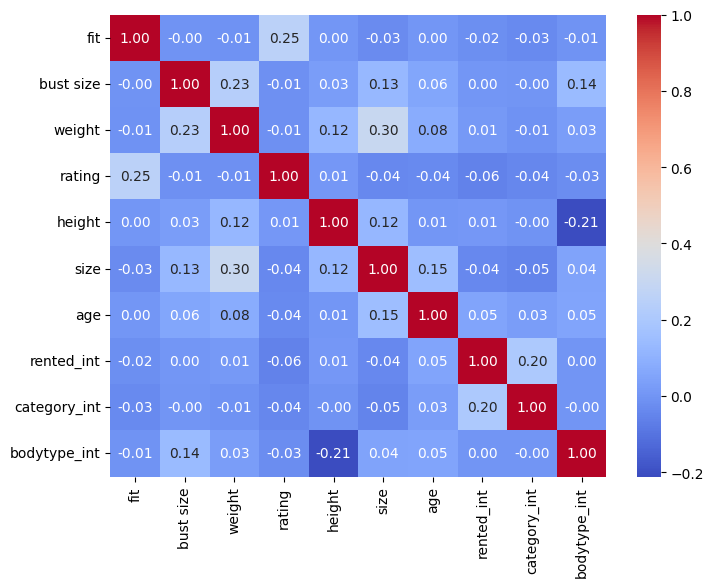

In [66]:
df = pd.DataFrame(renttherunway_fea)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8, 6))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

plt.show()

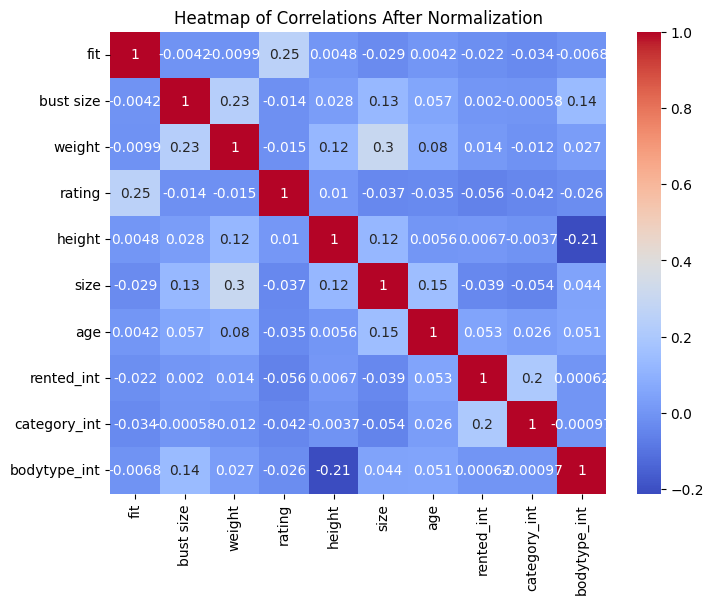

In [67]:
df = pd.DataFrame(renttherunway_fea)
scaler = MinMaxScaler()
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
corr = df.corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations After Normalization')
plt.savefig("heatmap_ds2")
plt.show()

In [68]:
renttherunway_fea[0]

{'fit': 1,
 'user_id': '273551',
 'bust size': 34.15384615384615,
 'item_id': '153475',
 'weight': 132,
 'rating': 10,
 'rented for': [1, 0, 0, 0, 0, 0, 0, 0],
 'review_text': 'I rented this dress for a photo shoot. The theme was "Hollywood Glam and Big Beautiful Hats". The dress was very comfortable and easy to move around in. It is definitely on my list to rent again for another formal event. ',
 'body type': [1, 0, 0, 0, 0, 0, 0],
 'review_summary': 'I felt so glamourous!!!',
 'category': [1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'height': 5.6,
 'size': 12,
 'age': 36,
 'review_date': 'June 18, 2013',
 'rented_int': 1,
 'category_int': 1,
 'bodytype_int': 1}

In [69]:
len(renttherunway_fea)

192543

In [69]:
len(modcloth_fea)

82789

In [70]:
renttherunway_fea_csv=[copy.copy(item) for item in renttherunway_fea]

In [71]:
renttherunway_fea[3]['user_id']

'151944'

In [72]:
for d in renttherunway_fea_csv:
    if 'review_summary' in d:
        del d['review_summary']
    if 'review_text' in d:
        del d['review_text']

In [73]:
userid={}
itemid={}
uc=1
ic=1
for d in renttherunway_fea_csv:
    if d['user_id'] not in userid:
        userid[d['user_id']]=uc
        uc+=1
    if d['item_id'] not in itemid:
        itemid[d['item_id']]=ic
        ic+=1
for d in renttherunway_fea_csv:
    d['user_id']=userid[d['user_id']]
    d['item_id']=itemid[d['item_id']]
    

In [74]:
import csv

data1 = renttherunway_fea_csv[:154000]
data2 = renttherunway_fea_csv[154000:174000]
data3 = renttherunway_fea_csv[174000:]

filename1 = 'renttherunway_final_data_processed_train.csv'
filename2 = 'renttherunway_final_data_processed_valid.csv'
filename3 = 'renttherunway_final_data_processed_test.csv'

with open(filename1, 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=data1[0].keys())
    writer.writeheader()
    for row in data1:
        writer.writerow(row)
with open(filename2, 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=data2[0].keys())
    writer.writeheader()
    for row in data2:
        writer.writerow(row)
with open(filename3, 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=data3[0].keys())
    writer.writeheader()
    for row in data3:
        writer.writerow(row)


In [75]:
y1=[]
with open('actual_label_jaccard_modcloth.txt', 'r') as file:
    y1 = file.read().replace("[","").strip('\n').split(']')[0]
    y1=y1.split(",")
    y1=[int(i) for i in y1]
    

In [76]:
sum(y1)

5697

In [77]:
y2=[]
with open('actual_label_similarit_renttherunway.txt', 'r') as file:
    y2 = file.read().replace("[","").strip('\n').split(']')[0]
    y2=y2.split(",")
    y2=[int(i) for i in y2]

In [70]:
modcloth_fea

[{'item_id': '123373',
  'waist': 31,
  'size': 13,
  'quality': 3,
  'cup size': 2,
  'hips': '30',
  'bra size': 36,
  'category': [1, 0, 0, 0, 0, 0, 0],
  'length': 2,
  'height': 5.2,
  'user_name': 'sydneybraden2001',
  'fit': 0,
  'user_id': '587883',
  'shoe size': 4.072374072297787,
  'category_int': 1},
 {'item_id': '123373',
  'waist': 30,
  'size': 7,
  'quality': 2,
  'cup size': 2,
  'shoe size': 9.0,
  'bra size': 32,
  'category': [1, 0, 0, 0, 0, 0, 0],
  'length': 3,
  'height': 5.7,
  'user_name': 'Ugggh',
  'fit': 0,
  'user_id': '395665',
  'category_int': 1},
 {'item_id': '123373',
  'category': [1, 0, 0, 0, 0, 0, 0],
  'size': 21,
  'quality': 5,
  'user_name': 'alexmeyer626',
  'length': 2,
  'fit': 1,
  'cup size': 5,
  'user_id': '875643',
  'waist': 15,
  'shoe size': 4.072374072297787,
  'bra size': 17,
  'category_int': 1,
  'height': 2.728215251607958},
 {'item_id': '123373',
  'category': [1, 0, 0, 0, 0, 0, 0],
  'size': 18,
  'quality': 5,
  'user_name': '

In [78]:
renttherunway_fea

[{'fit': 1,
  'user_id': '273551',
  'bust size': 34.15384615384615,
  'item_id': '153475',
  'weight': 132,
  'rating': 10,
  'rented for': [1, 0, 0, 0, 0, 0, 0, 0],
  'review_text': 'I rented this dress for a photo shoot. The theme was "Hollywood Glam and Big Beautiful Hats". The dress was very comfortable and easy to move around in. It is definitely on my list to rent again for another formal event. ',
  'body type': [1, 0, 0, 0, 0, 0, 0],
  'review_summary': 'I felt so glamourous!!!',
  'category': [1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  'height': 5.6,
  'size': 12,
  'age': 36,
  'review_date': 'June 18, 2013',
  'rent

In [78]:
shoes.pop('-1')

54874

In [79]:
shoes

{'9.00': 3599,
 '8.50': 3982,
 '11.00': 860,
 '7.00': 3193,
 '6.00': 1338,
 '8.00': 3832,
 '6.50': 1829,
 '10.00': 2419,
 '7.50': 3704,
 '5.50': 589,
 '9.50': 1806,
 '10.50': 356,
 '5.00': 316,
 '11.50': 91,
 '38': 1}

In [92]:
x=[float(i) for i in shoes.keys()]
sorted_indices = [index for (value, index) in sorted((value, index) for (index, value) in enumerate(x))]

In [ ]:
sorted_other_list = [other_list[i] for i in sorted_indices]

In [95]:
sorted_indices

[12, 9, 4, 6, 3, 8, 5, 1, 0, 10, 7, 11, 2, 13, 14]

In [104]:
cups

{'b': 14628,
 'dd/e': 12557,
 'c': 18370,
 'd': 16148,
 'ddd/f': 6117,
 'dddd/g': 2008,
 'i': 189,
 'a': 4791,
 'h': 1042,
 'aa': 296,
 'j': 200,
 'k': 188}

In [105]:
cups_index

{'aa': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'dd/e': 5,
 'ddd/f': 6,
 'dddd/g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11}

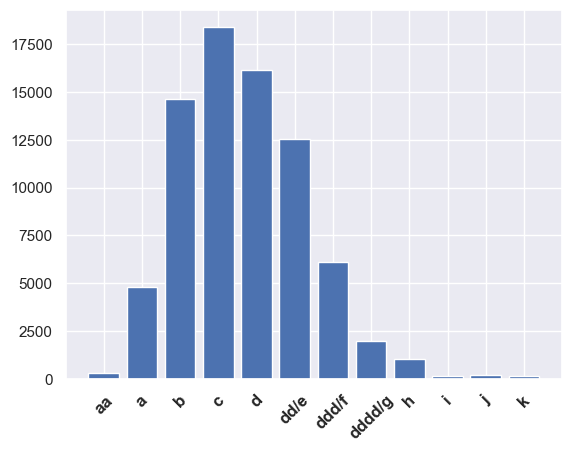

In [108]:
l=[cups_index[i] for i in cups.keys()]
sorted_indices = [index for (value, index) in sorted((value, index) for (index, value) in enumerate(l))]

x=[list(cups.keys())[i] for i in sorted_indices]
y=[list(cups.values())[i] for i in sorted_indices]
xname=""
yname=""
name="Cups Distribution"
barplot(x,y,xname,yname,name)

In [149]:
def draw(d,name,index=None):
    if "-1" in d.keys():
        d.pop("-1")
    if index!=None:
        l=[index[i] for i in d.keys()] 
    else:
        l=[float(i) for i in d.keys()] 
    sorted_indices = [index for (value, index) in sorted((value, index) for (index, value) in enumerate(l))]
    
    x=[list(d.keys())[i] for i in sorted_indices]
    y=[list(d.values())[i] for i in sorted_indices]
    xname=""
    yname=""
    barplot(x,y,xname,yname,name)

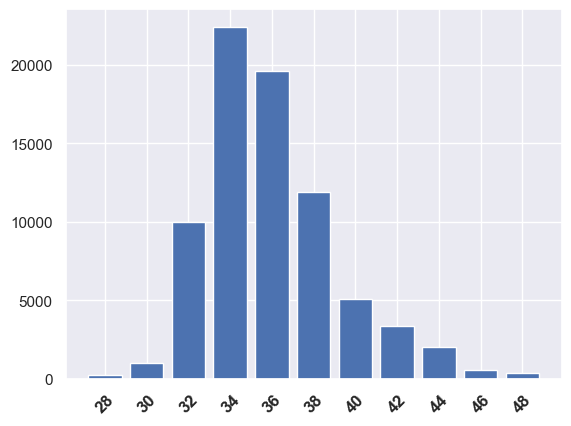

In [102]:
draw(bra,"Bra Distribution")

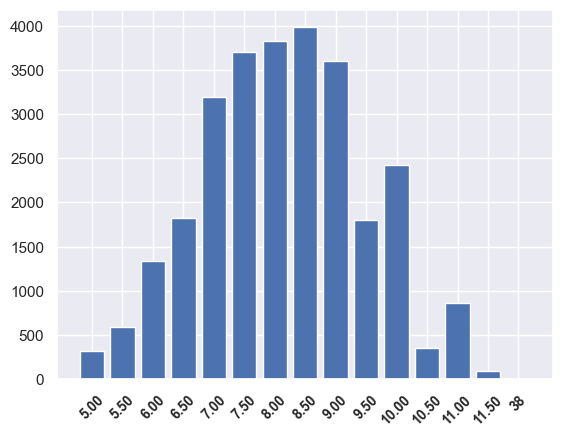

In [150]:
draw(shoes,"Shoes Distribution")

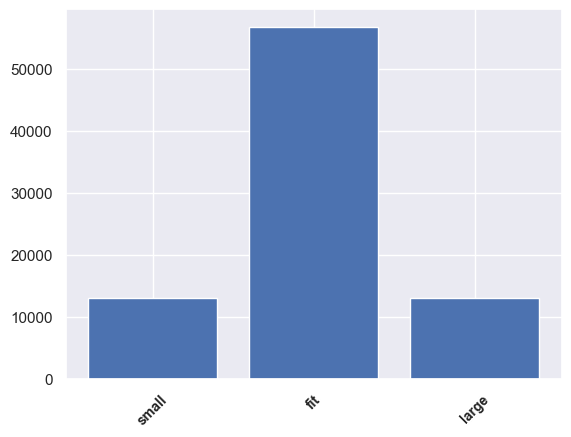

In [154]:
draw(fit,"Fit Distribution",fit_index)

In [152]:
fit

{'small': 12973, 'fit': 56757, 'large': 13059}

In [153]:
fit_index={'small': 0, 'fit': 1, 'large': 2}

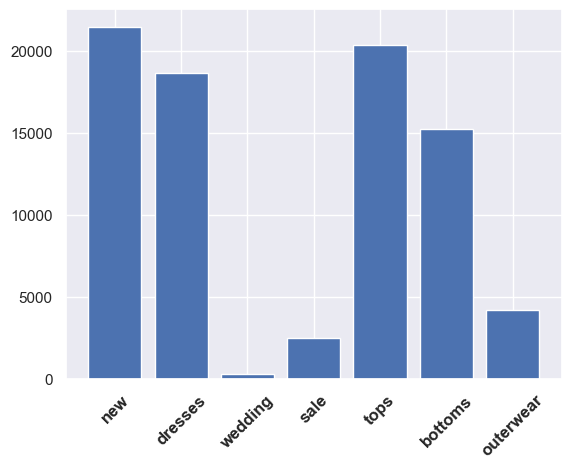

In [114]:
draw(category,"Category Distribution",category_index)

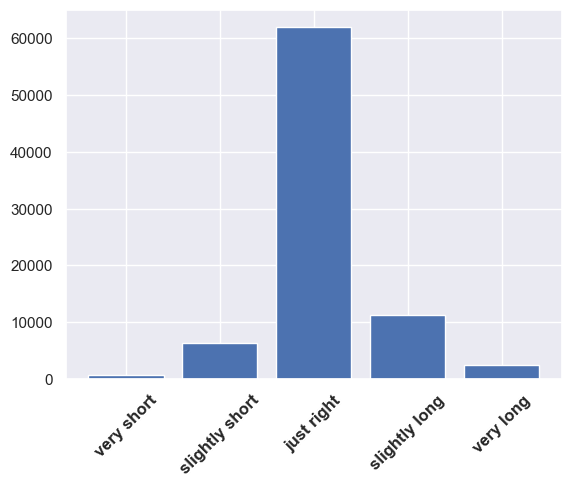

In [115]:
draw(length,"Length Distribution",length_index)

In [121]:
height.pop("-1")

1107

In [123]:
list(height.keys())

['5ft 2in',
 '5ft 7in',
 '5ft 4in',
 '5ft 3in',
 '5ft 5in',
 '5ft 10in',
 '5ft 6in',
 '5ft 8in',
 '5ft',
 '5ft 9in',
 '5ft 1in',
 '5ft 11in',
 '4ft 11in',
 '4ft 10in',
 '6ft',
 '3ft 4in',
 '4ft 9in',
 '6ft 3in',
 '6ft 1in',
 '6ft 2in',
 '3ft',
 '4ft 7in',
 '4ft 4in',
 '7ft 11in',
 '4ft 2in',
 '6ft 6in',
 '4ft 8in',
 '6ft 4in',
 '3ft 11in',
 '6ft 5in',
 '7ft 6in',
 '3ft 6in',
 '3ft 3in',
 '6ft 8in',
 '7ft 5in',
 '7ft 3in',
 '7ft 7in',
 '6ft 7in',
 '4ft 5in',
 '3ft 2in',
 '4ft 6in']

In [124]:
l=list(height.keys())

In [125]:
sorted_indices = [index for (value, index) in sorted((value, index) for (index, value) in enumerate(l))]

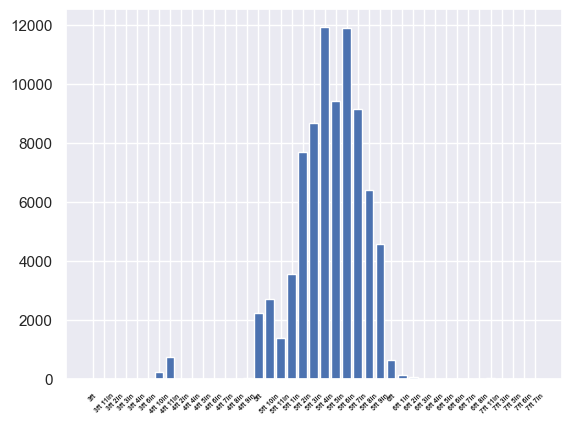

In [137]:
draw(height,"Height Distribution",)

In [141]:
size=sfeature("size")

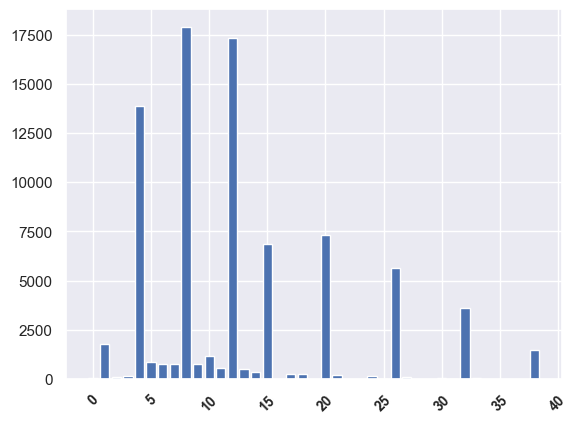

In [145]:
draw(size,"Size Distribution",)

In [144]:
def barplot(x,y,xname,yname,name):
    sns.set()
    plt.bar(x, y, width=0.8)
    
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.xticks(fontsize=10, rotation=45, fontname='Arial', fontweight='bold')
    plt.savefig(name)
    plt.show()

In [ ]:
xcat=[i['category_int'] for i in renttherunway_fea]

In [ ]:
xbody=[i['bodytype_int'] for i in renttherunway_fea]

In [ ]:
ycat=[]

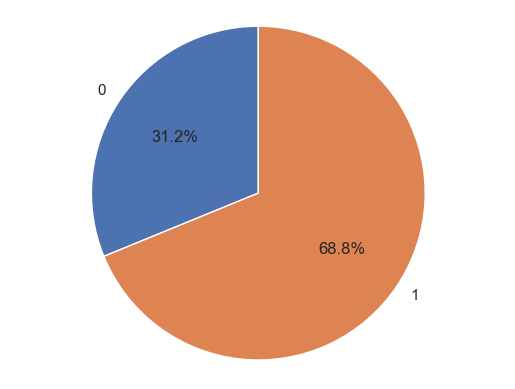

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

labels = '0','1'
sizes = [len(y1)-sum(y1), sum(y1)]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)


ax1.axis('equal')  


plt.show()

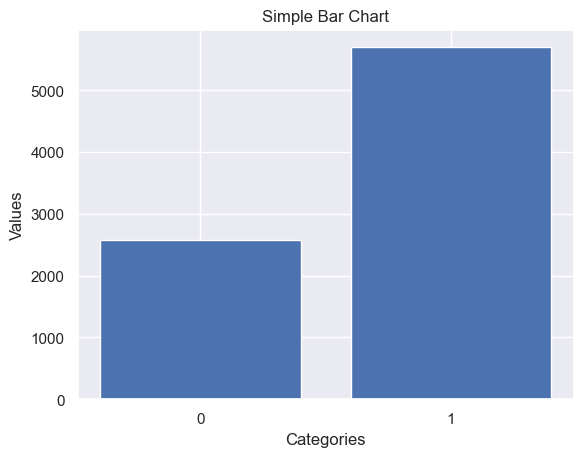

In [39]:
sns.set()

# 数据
categories = ['0','1']
values = [len(y1)-sum(y1), sum(y1)]

# 创建柱状图
plt.bar(categories, values)

# 添加标题和标签
plt.title('Simple Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')

# 显示图表
plt.show()